# Projeto Machine Learning

**Objetivo**: Através dos Dados do Censo detectar se a renda da pessoa excede o valor de 50 mil por ano.

**Habilidades Avaliadas**: 
* Técnicas de Transformação e Preparação de dados
* Aplicação, Avaliação e Tunning de Modelos de Machine Learning para Classificação.

**Dataset**: O conjunto de dados para este projeto é originário do Repositório de Aprendizado de Máquina da UCI (https://archive.ics.uci.edu/ml/datasets/Adult)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
aux = '/content/drive/My Drive/LINGUAGENS/PYTHON/9 - DATA SCIENCE DO ZERO/14 - MÓDULO EXTRA PORTFÓLIO/'

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv(aux + 'adult.data')

## Conhecendo a Base de Dados

In [0]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [0]:
df.count()

age                48842
workclass          48842
education          48842
educational-num    48842
marital-status     48842
occupation         48842
relationship       48842
race               48842
sex                48842
capital-gain       48842
capital-loss       48842
hours-per-week     48842
native-country     48842
income             48842
dtype: int64

## Colunas do Dataset

**age**: Idade.

**workclass**: Classe trabalhadora. Se a pessoa é funcionário público, autônomo, empresário etc.

**education**: Níveis de Escolaridade.

**education-num**: Código do Nível de Escolaridade.

**marital-status**: Estado Civil.

**occupation**: Ocupação (Suporte técnico, Conserto de arte, Outros serviços, Vendas, Exec-managerial, Prof-specialty, Manipuladores de limpeza, Machine-op-inspct, Adm-clerical, Pesca agropecuária, Transport-moving, Priv-house-serv, Serviço de Proteção, Forças Armadas)

**relationship**: Relacionamento (Esposa, Filha Própria, Marido, Não-familiar, Outro-parente, Solteira.)

**race**: Raça (Preto, branco, asiático-Pac-Islander, Amer-Indian-Eskimo, Outro.)

**sex**: Sexo(Feminino, Masculino).

**capital-gain**: Ganho de Capital.

**capital-loss**: Perda de Capital.

**hours-per-week**: Horas de trabalho por Semana.

**native-country**: País Nativo (Estados Unidos, Camboja, Inglaterra, Porto Rico, Canadá, Alemanha, EUA (Guam-USVI-etc), Índia, México, Portugal etc)

# Tarefas

####  <span style="color:Blue">  Análise Exploratória </span>
1) Faça análise exploratória na base de dados e tente responder as seguintes questões:

* **a)** Visualize a distribuição das classes (variável income).
* **b)** Visualize a distribuição das classes por Nível de Escolaridade.
* **c)** Visualize a relação (scatter) das colunas age,sex e race com a coluna income.

**Como fazer?**

Para isso, você precisa como pré-requisito o conhecimento de Python e Pandas que são mostrados nos capítulos **Dominando o Python** e **Python para Análise de Dados**. 

Nas aulas de Pandas assista principalmente a parte onde é exibida a integração com Matplotlib.

#### Visualize a distribuição das classes (variável income).

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

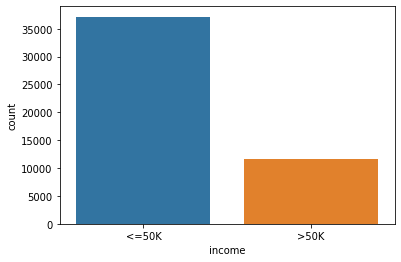

In [0]:
#plt.figure(figsize= (8,6))
sns.countplot(x= 'income', data= df)

#### Visualize a distribuição das classes por Nível de Escolaridade.

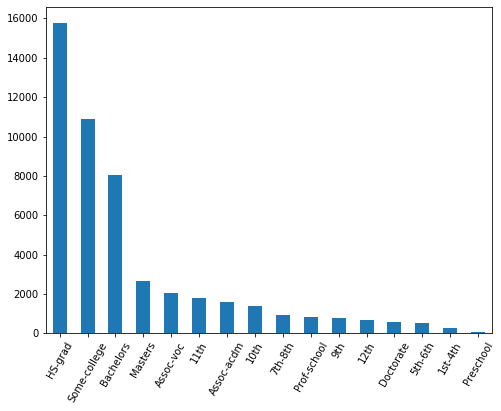

In [0]:
df['education'].value_counts().plot.bar(figsize= (8,6), rot= 60)

#### Visualize a relação (scatter) das colunas age,sex e race com a coluna income.

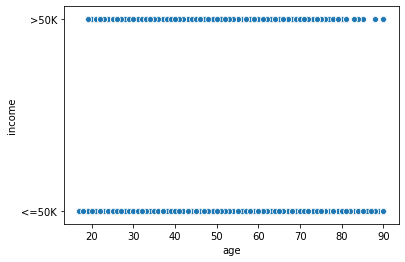

In [0]:
#relação entre age e income
sns.scatterplot(x= 'age', y= 'income', data= df)

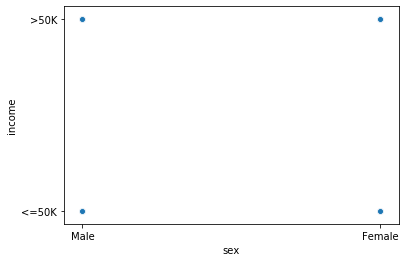

In [0]:
#relação entre sex e income
sns.scatterplot(x= 'sex', y= 'income', data= df)

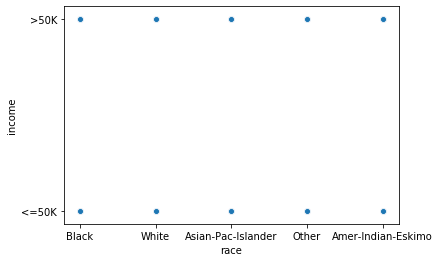

In [0]:
#relação entre race e income
sns.scatterplot(x= 'race', y= 'income', data= df)

####  <span style="color:Blue">  Verificação e Análise de Dados </span>
2) Faça uma análise e pre-processamento nos dados:

* **a)** Verifique se existem dados missing.
* **b)** Converta colunas categóricas para numéricas usando **LabelEnconder** ou **OneHotEnconder**.
* **c)** Explique qual técnica de conversão você usou e por quê.

**Como fazer?**

Para visualizar dados missing consulte o capítulo **Python para Análise de Dados**.

Para converter dados categóricos veja as seguintes aulas sobre LabelEncoder e One Hot Enconder no Capítulo de Machine Learning:
* **SVM - Criando um Classificador de Músicas do Spotify - Aula 07**

> Através do exemplo prático mostramos como funciona a técnica Label Encoding com suas vantagens e desvantagens e como aplicar na base de dados.

* **SVM - Processando Dados Categóricos com o One hot Enconding- Aula 08**
> Nesta aula você irá entender os conceitos do One Hot Encoding e as alterações que serão feitas na base de dados.

* **SVM - Aplicando o Get Dummies nos Dados - Aula 09**
> Por fim, na aula 09 aplicamos o One Hot Enconding na base de dados utilizando o método get_dummies() conforme cobrado no exemplo acima.

#### Verifique se existem dados missing

In [0]:
df.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

#### Converta colunas categóricas para numéricas usando LabelEnconder ou OneHotEnconder.

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
enc = LabelEncoder()

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
age                48842 non-null int64
workclass          48842 non-null object
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
sex                48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [0]:
aux = df.drop(labels=['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'income', 'educational-num', 'education'], axis= 1)

In [0]:
aux2 = df[aux.columns].apply(enc.fit_transform)

In [0]:
aux2

,workclass,marital-status,occupation,relationship,race,sex,native-country
0,4,4,7,3,2,1,39
1,4,2,5,0,4,1,39
2,2,2,11,0,4,1,39
3,4,2,7,0,2,1,39
4,0,4,0,3,4,0,39
...,...,...,...,...,...,...,...
48837,4,2,13,5,4,0,39
48838,4,2,7,0,4,1,39
48839,4,6,1,4,4,0,39
48840,4,4,1,3,4,1,39


In [0]:
df.drop(labels= aux.columns, axis= 1, inplace= True)

In [0]:
df = pd.concat([df, aux2], axis= 1)

In [0]:
df

,age,education,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass,marital-status,occupation,relationship,race,sex,native-country
0,25,11th,7,0,0,40,<=50K,4,4,7,3,2,1,39
1,38,HS-grad,9,0,0,50,<=50K,4,2,5,0,4,1,39
2,28,Assoc-acdm,12,0,0,40,>50K,2,2,11,0,4,1,39
3,44,Some-college,10,7688,0,40,>50K,4,2,7,0,2,1,39
4,18,Some-college,10,0,0,30,<=50K,0,4,0,3,4,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Assoc-acdm,12,0,0,38,<=50K,4,2,13,5,4,0,39
48838,40,HS-grad,9,0,0,40,>50K,4,2,7,0,4,1,39
48839,58,HS-grad,9,0,0,40,<=50K,4,6,1,4,4,0,39
48840,22,HS-grad,9,0,0,20,<=50K,4,4,1,3,4,1,39


In [0]:
#df['income'] = enc.fit_transform(df['income'])

In [0]:
df.nunique()

age                 74
education           16
educational-num     16
capital-gain       123
capital-loss        99
hours-per-week      96
income               2
workclass            9
marital-status       7
occupation          15
relationship         6
race                 5
sex                  2
native-country      42
dtype: int64

#### Explique qual técnica de conversão você usou e por quê?

Foi utilizado a técnica de label enconder pelo fato dele colocar uma identificação única para cada valor único contido nos dados categóricos respectivo a sua classe, pois se utilizado onehot havia um acréscimo absurdo de features no qual iria afetar no tempo de processamento do modelo.

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
data = df.drop(labels= ['income', 'education'], axis= 1)
target = df['income']

In [0]:
data

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass,marital-status,occupation,relationship,race,sex,native-country
0,25,7,0,0,40,4,4,7,3,2,1,39
1,38,9,0,0,50,4,2,5,0,4,1,39
2,28,12,0,0,40,2,2,11,0,4,1,39
3,44,10,7688,0,40,4,2,7,0,2,1,39
4,18,10,0,0,30,0,4,0,3,4,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,4,2,13,5,4,0,39
48838,40,9,0,0,40,4,2,7,0,4,1,39
48839,58,9,0,0,40,4,6,1,4,4,0,39
48840,22,9,0,0,20,4,4,1,3,4,1,39


In [0]:
df_scale = scaler.fit_transform(data)

In [0]:
df_scale = pd.DataFrame(data= df_scale, columns= data.columns)

In [0]:
df_scale

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass,marital-status,occupation,relationship,race,sex,native-country
0,-0.995129,-1.197259,-0.144804,-0.217127,-0.034087,0.088484,0.916138,0.099824,0.971649,-1.971746,0.70422,0.289462
1,-0.046942,-0.419335,-0.144804,-0.217127,0.772930,0.088484,-0.410397,-0.372938,-0.900852,0.392384,0.70422,0.289462
2,-0.776316,0.747550,-0.144804,-0.217127,-0.034087,-1.277432,-0.410397,1.045346,-0.900852,0.392384,0.70422,0.289462
3,0.390683,-0.030373,0.886874,-0.217127,-0.034087,0.088484,-0.410397,0.099824,-0.900852,-1.971746,0.70422,0.289462
4,-1.505691,-0.030373,-0.144804,-0.217127,-0.841104,-2.643348,0.916138,-1.554840,0.971649,0.392384,-1.42001,0.289462
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.849254,0.747550,-0.144804,-0.217127,-0.195490,0.088484,-0.410397,1.518107,2.219984,0.392384,-1.42001,0.289462
48838,0.098933,-0.419335,-0.144804,-0.217127,-0.034087,0.088484,-0.410397,0.099824,-0.900852,0.392384,0.70422,0.289462
48839,1.411808,-0.419335,-0.144804,-0.217127,-0.034087,0.088484,2.242673,-1.318460,1.595817,0.392384,-1.42001,0.289462
48840,-1.213941,-0.419335,-0.144804,-0.217127,-1.648120,0.088484,0.916138,-1.318460,0.971649,0.392384,0.70422,0.289462


####  <span style="color:Blue">  Pré-processamento de Dados </span>

3) Faça um pré-processamento nos dados antes de aplicar os algoritmos de Machine learning.

* **a)** Aplique algum padronizador ou normalizador nos dados numéricos.
* **b)** Explique qual técnica você usou e por quê.

**Como Fazer?**

Nesta etapa são feitas transformações nos atributos númericos para evitar que os algoritmos de Machine Learning sofram com diferentes escalas de valores e produzam resultados ruins.

Explicamos essas tranformações em detalhes no capítulo **Pré-Processamento de Dados**. 

Aprendemos o funcionamento e aplicação do **MinMax Scaler**, **Standard Scaler**, **Normalizer** etc.

Assista essas aulas e aplique alguma das técnicas citadas acima.

In [0]:
from sklearn.preprocessing import Normalizer

In [0]:
normalize = Normalizer()

In [0]:
normalize.fit(df_scale)

Normalizer(copy=True, norm='l2')

In [0]:
df_normalize = normalize.fit_transform(df_scale)

In [0]:
df_normalize = pd.DataFrame(data= df_normalize, columns= data.columns)

In [0]:
df_normalize.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass,marital-status,occupation,relationship,race,sex,native-country
0,-0.336191,-0.404477,-0.048920,-0.073353,-0.011516,0.029893,0.309505,0.033724,0.328258,-0.666127,0.237911,0.097791
1,-0.028546,-0.255004,-0.088057,-0.132038,0.470031,0.053809,-0.249569,-0.226789,-0.547822,0.238615,0.428248,0.176027
2,-0.326051,0.313969,-0.060817,-0.091193,-0.014316,-0.536519,-0.172366,0.439043,-0.378356,0.164800,0.295771,0.121573
3,0.153788,-0.011956,0.349107,-0.085469,-0.013418,0.034831,-0.161548,0.039294,-0.354610,-0.776154,0.277208,0.113943
4,-0.370833,-0.007481,-0.035663,-0.053476,-0.207153,-0.651023,0.225633,-0.382938,0.239305,0.096639,-0.349731,0.071291


####  <span style="color:Blue">  Classificação e Avaliação de Modelos </span>

4) Treine pelo menos dois algoritmos supervisionados voltados para tarefas de classificação.

* **a)** Avalie os modelos separando os dados de **treino** e **teste** (use train_test_split).
* **b)** Avalie os modelos usando **Cross Validation** (Crie uma função para repetir menos código).
* **c)** Explique a diferença entre de cada uma das abordagens acima com suas vantagens e desvantagens.
* **d)** Imprima os resultados para cada modelo e abordagem de avaliação utilizando as métricas **Precisão**, **Recall** e **F1 Score**.

**Como fazer?**

Todos os requisitos necessários para completar as etapas dessa tarefa se encontram no capítulo de Machine Learning.

Para o entendimento completo das **Técnicas de Avaliação de Modelos** cobradas, veja as aulas:
* **Machine Learning  - Métricas de Avaliação de Modelos** 
* **Machine Learning  - Entendendo o que é a Matriz de Confusão**.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_normalize, target, test_size= 0.3)

In [0]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
clf.score(X_test, y_test)

0.852726404149321

In [0]:
dt.score(X_test, y_test)

0.8106189858732

In [0]:
logmodel.score(X_test, y_test)

0.8332764621579198

In [0]:
result = dt.predict(X_test)
result2 = clf.predict(X_test)
result3 = logmodel.predict(X_test)

In [0]:
print('tree' + classification_report(y_test, result))
print('clf' + classification_report(y_test, result2))
print('logmodel' + classification_report(y_test, result3))

tree              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88     11198
        >50K       0.60      0.58      0.59      3455

    accuracy                           0.81     14653
   macro avg       0.74      0.73      0.73     14653
weighted avg       0.81      0.81      0.81     14653

clf              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91     11198
        >50K       0.77      0.54      0.63      3455

    accuracy                           0.85     14653
   macro avg       0.82      0.75      0.77     14653
weighted avg       0.85      0.85      0.84     14653

logmodel              precision    recall  f1-score   support

       <=50K       0.86      0.94      0.90     11198
        >50K       0.71      0.49      0.58      3455

    accuracy                           0.83     14653
   macro avg       0.78      0.72      0.74     14653
weighted avg       0.82      0.83      0.82     14653



In [0]:
print(pd.crosstab(y_test, result, rownames=['real'], colnames=['dt predito'], margins= True))

dt predito  <=50K  >50K    All
real                          
<=50K        9881  1317  11198
>50K         1458  1997   3455
All         11339  3314  14653


In [0]:
print(pd.crosstab(y_test, result2, rownames=['real'], colnames=['clf predito'], margins= True))

clf predito  <=50K  >50K    All
real                           
<=50K        10625   573  11198
>50K          1585  1870   3455
All          12210  2443  14653


In [0]:
print(pd.crosstab(y_test, result3, rownames=['real'], colnames=['logmodel predito'], margins= True))

logmodel predito  <=50K  >50K    All
real                                
<=50K             10512   686  11198
>50K               1757  1698   3455
All               12269  2384  14653


In [0]:
from sklearn import metrics
def acc(estimador, data, target):
    resultado = cross_val_predict(estimator= estimador, X= data, y= target, cv= 5)
    return metrics.accuracy_score(resultado, target)

In [0]:
acc(dt, X_test, y_test)

0.8072749607588889

In [0]:
acc(clf, X_test, y_test)

0.8484269432880639

In [0]:
acc(logmodel, X_test, y_test)

0.8338906708523852

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [0]:
pip_1 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', SVC(kernel='rbf'))
])

pip_2 = Pipeline(steps= [
    ('min_max_scaler', MinMaxScaler()),
    ('dt', DecisionTreeClassifier())
])

pip_3 = Pipeline(steps= [
    ('min_max_scaler', MinMaxScaler()),
    ('logmodel', LogisticRegression())
])

In [0]:
lista_C = [0.01, 0.1]
lista_gamma = [0.01, 0.1]
parametros_grid = dict(clf__C=lista_C, clf__gamma=lista_gamma)
grid = GridSearchCV(pip_1,parametros_grid, cv=5, scoring='accuracy')

In [0]:
grid.fit(data, target)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001

In [0]:
aux = grid.cv_results_
aux['mean_test_score']

####  <span style="color:Blue"> Tunning do Modelo </span>

5) Faça um Tunning dos modelos e verifique o melhor resultado.

* Defina os melhores Hyperparametros para os algoritmos utilizando o GridSearch.
* Implemente usando Pipelines.
* Avalie os modelos usando **Cross Validation** (Utilize o recuso já integrado ao Pipeline).

**Como fazer?**

Consulte o capítulo **Machine Learning** e utilize o recurso de **GridSearch**.

Veja as aulas sobre **Pipelines** e **Métricas de Avaliação de Modelos**.